In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
import tensorflow as tf

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn


In [ ]:
# extraction and merging x_train and y_train
data_path = "sample_data/X_train.csv"
data_path_test = "sample_data/X_test.csv"

data_raw = pd.read_csv(data_path,  error_bad_lines=False, sep=';')
data_path_y = "sample_data/y_train.csv"
data_raw_y = pd.read_csv(data_path_y,  error_bad_lines=False, sep=';')
data_raw_test = pd.read_csv(data_path_test,  error_bad_lines=False, sep=';')

df = pd.merge(data_raw, data_raw_y, on="Id")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


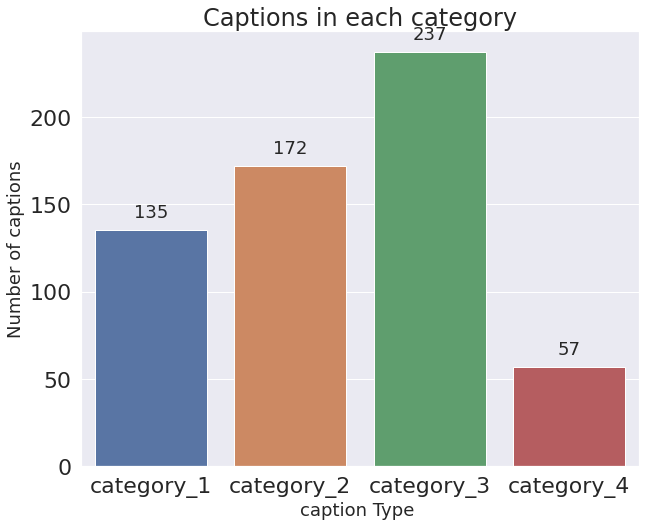

In [ ]:
# visualization of the distribution
categories = list(df.columns.values[2:])
sns.set(font_scale = 2)
plt.figure(figsize=((10,8)))
ax= sns.barplot(categories, df.iloc[:,2:].sum().values)
plt.title("Captions in each category", fontsize=24)
plt.ylabel('Number of captions', fontsize=18)
plt.xlabel('caption Type ', fontsize=18)
#adding the text labels
rects = ax.patches
labels = df.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)
plt.show()

In [ ]:
# Loading data
data = data_raw
data

,Id,Caption
0,2,de mourir avant l'heure\n de ne plus revoir me...
1,3,la maladie pour les autres et pour moi\n et le...
2,4,Comment vont s'en sortir ceux qui sont mal ou ...
3,6,"Inquiétude pour la santé de mes proches, pour ..."
4,7,"Bien entendu contracter la maladie,"
...,...,...
480,591,avoir une forme grave du civid
481,592,Inquiétude de ne pas retrouver une liberté d'a...
482,594,L'incertitude dans laquelle nous sommes. \n Ne...
483,595,"inquiétude normale face à une épidémie, craint..."


In [ ]:
# Preprocessing 
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

In [ ]:
def cleanHtml(sentence): #function to remove html-tags from the sentences
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = sentence.replace("l'","")
    cleaned = cleaned.replace("é","e")
    cleaned = re.sub(r'[?|!|\|"|#]',r'',cleaned)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

In [ ]:
data['Caption'] = data['Caption'].str.lower()
data['Caption'] = data['Caption'].apply(cleanHtml)
data['Caption'] = data['Caption'].apply(cleanPunc)
data['Caption']

0      de mourir avant heure  de ne plus revoir mes p...
1      la maladie pour les autres et pour moi  et les...
2      comment vont s'en sortir ceux qui sont mal ou ...
3      inquietude pour la sante de mes proches  pour ...
4                     bien entendu contracter la maladie
                             ...                        
480                       avoir une forme grave du civid
481    inquietude de ne pas retrouver une liberte d'a...
482    incertitude dans laquelle nous sommes    ne pl...
483    inquietude normale face à une epidemie  craint...
484       que les autres ne respectent pas les barrières
Name: Caption, Length: 485, dtype: object

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Stop words
stop_words = set(stopwords.words('french'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['Caption'] = data['Caption'].apply(removeStopWords)

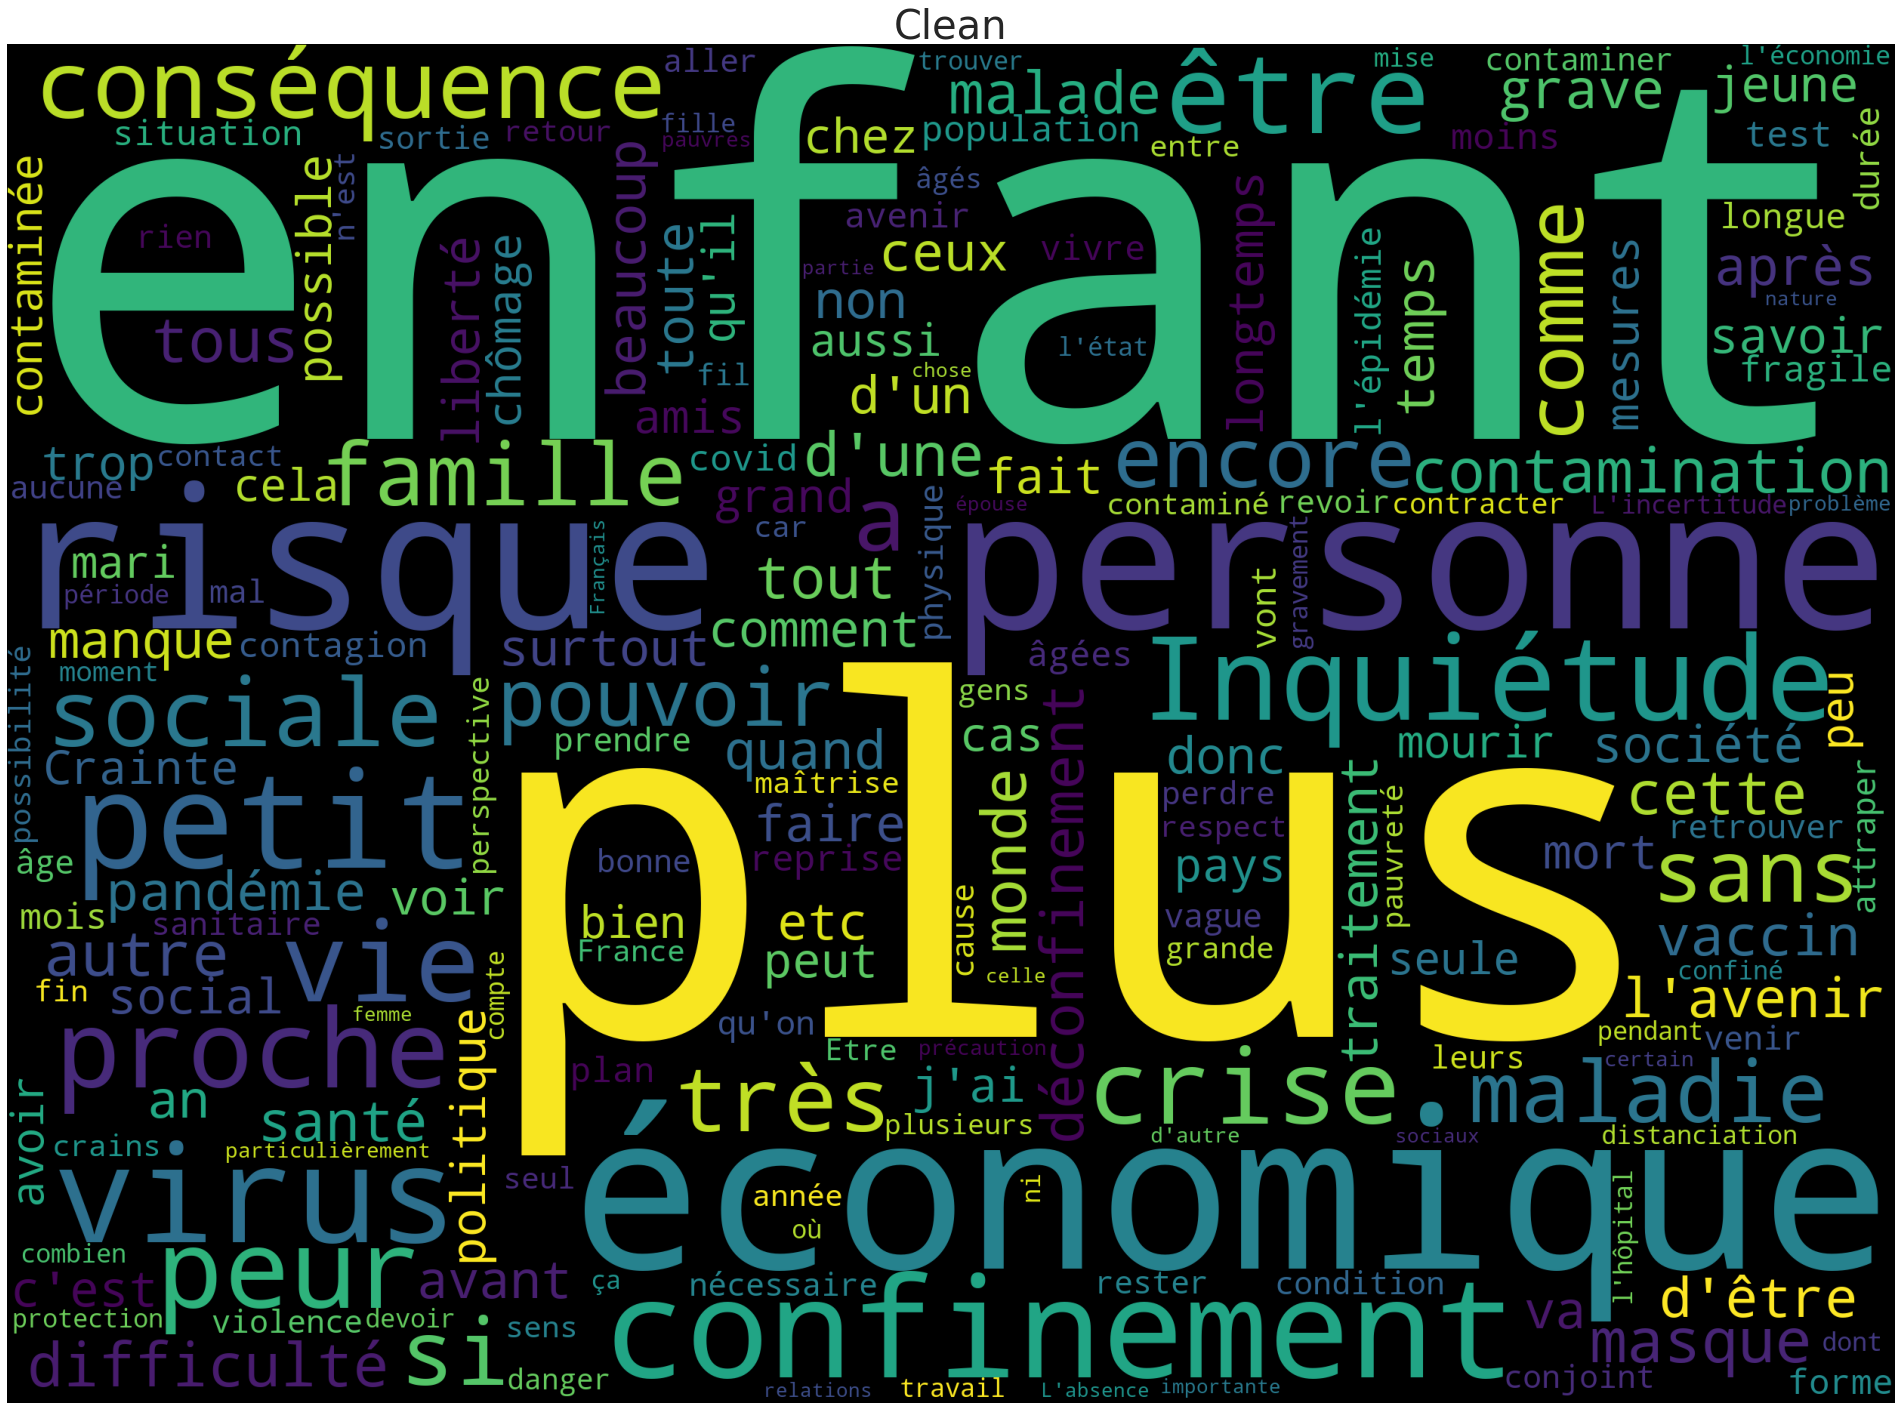

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(40,25))
# clean
subset = df
text = subset.Caption.values
cloud_toxic = WordCloud(
                          stopwords=stopwords.words('french'),
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)

In [ ]:
## Stemming 
stemmer = SnowballStemmer("french")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence
df['Caption'] = df['Caption'].apply(stemming)
df['Caption']

0      de mour avant l'heur de ne plus revoir me peti...
1      la malad pour le autr et pour moi et le conséq...
2      comment vont s'en sort ceux qui sont mal ou pa...
3      inquiétud pour la sant de me proches, pour le ...
4                      bien entendu contract la maladie,
                             ...                        
480                         avoir une form grav du civid
481    inquiétud de ne pas retrouv une libert d'actio...
482    l'incertitud dan laquel nous sommes. ne plus v...
483    inquiétud normal fac à une épidémie, craint de...
484          que le autr ne respectent pas le barrières.
Name: Caption, Length: 485, dtype: object

In [ ]:
df

,Id,Caption,category_1,category_2,category_3,category_4
0,2,de mour avant l'heur de ne plus revoir me peti...,1,1,0,0
1,3,la malad pour le autr et pour moi et le conséq...,0,1,0,0
2,4,comment vont s'en sort ceux qui sont mal ou pa...,0,1,0,0
3,6,"inquiétud pour la sant de me proches, pour le ...",0,1,0,0
4,7,"bien entendu contract la maladie,",1,0,0,0
...,...,...,...,...,...,...
480,591,avoir une form grav du civid,1,0,0,0
481,592,inquiétud de ne pas retrouv une libert d'actio...,0,0,0,1
482,594,l'incertitud dan laquel nous sommes. ne plus v...,0,1,0,1
483,595,"inquiétud normal fac à une épidémie, craint de...",0,1,0,0


In [ ]:
# prepare the data for the multi-label classification model using the pre-trained model CamemBert
df.drop(['Id'], inplace = True, axis = 1)
df['labels'] = df.iloc[:,1:].values.tolist()
df.drop(df.columns.values[1:-1].tolist(), inplace = True, axis=1)

In [ ]:
df.columns = ['text','labels']
df.head()

,text,labels
0,de mourir avant l'heure\n de ne plus revoir me...,"[1, 1, 0, 0]"
1,la maladie pour les autres et pour moi\n et le...,"[0, 1, 0, 0]"
2,Comment vont s'en sortir ceux qui sont mal ou ...,"[0, 1, 0, 0]"
3,"Inquiétude pour la santé de mes proches, pour ...","[0, 1, 0, 0]"
4,"Bien entendu contracter la maladie,","[1, 0, 0, 0]"


In [ ]:
# Libraries for the model
!pip install transformers
!pip install --upgrade transformers
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.5/250.5 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.3, shuffle=True) #test_size=0.33

In [ ]:
from simpletransformers.classification import (MultiLabelClassificationModel, MultiLabelClassificationArgs)
import pandas as pd
import logging
from simpletransformers.language_modeling import LanguageModelingModel, LanguageModelingArgs



logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
## définition des poids
print(labels)
total_examples = np.sum(labels)
num_classes = len(labels)
pos_weight = total_examples / (num_classes * labels)
print(pos_weight)

[135 172 237  57]
[1.11296296 0.87354651 0.63396624 2.63596491]


In [ ]:
model_args_ml = LanguageModelingArgs()
model_args_ml.config = {
    "num_hidden_layers": 2,
}



model_ml = LanguageModelingModel(
     "camembert",
      "camembert-base", args=model_args_ml , train_files='sample_data/nonlabeled_data.csv')


/usr/local/lib/python3.8/dist-packages/simpletransformers/language_modeling/language_modeling_model.py:396: UserWarning: use_multiprocessing automatically disabled as camembert fails when using multiprocessing for feature conversion.
  warnings.warn(


In [ ]:
!rm -r ll

In [ ]:
#model_ml.save_model('own_tokk')
model_ml.train_model('sample_data/nonlabeled_data.csv',output_dir='ll')


  0%|          | 0/726 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/91 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


(91, 2.8630113287286445)

In [ ]:
model_args = MultiLabelClassificationArgs(num_train_epochs = 20, learning_rate=1e-04, weight_decay = 0.01) # Optional model configuration
    # Create a MultiLabelClassificationModel
    # optimal result num_train_epochs = 20, learning_rate=1e-04, weight_decay = 0.01 without doing preprocessing for text and without training the model on the nonlabeled data
model = MultiLabelClassificationModel(
    "camembert",
    "ll",
    num_labels=4,
    args=model_args,
    pos_weight = [1.53703704, 1.20465116, 0.87552743, 3.62318841] 
  )
#"camembert-base"
## Delete the outputs
!rm -r outputs/ 

## Train the model 
model.train_model(train,acc=sklearn.metrics.roc_auc_score)
print('now for the train')

# Evaluate the model on trainset
train_result, train_model_outputs, train_wrong_predictions = model.eval_model(train,acc=sklearn.metrics.roc_auc_score)
print('now for the test') # ,acc=sklearn.metrics.roc_auc_score
# Evaluate the model on testset
test_result, test_model_outputs, test_wrong_predictions = model.eval_model(test,acc=sklearn.metrics.roc_auc_score)

test_result['LRAP']



Some weights of the model checkpoint at ll were not used when initializing CamembertForMultiLabelSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing CamembertForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForMultiLabelSequenceClassification were not initialized from the model checkpoint at ll and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'roberta.pooler.dense.bias', 'classifi

  0%|          | 0/339 [00:00<?, ?it/s]

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Running Epoch 0 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 1 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 2 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 3 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 4 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 5 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 6 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 7 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 8 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 9 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 10 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 11 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 12 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 13 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 14 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 15 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 16 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 17 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 18 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

Running Epoch 19 of 20:   0%|          | 0/43 [00:00<?, ?it/s]

now for the train


  0%|          | 0/339 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/43 [00:00<?, ?it/s]

now for the test


  0%|          | 0/146 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

0.9115296803652967

In [ ]:
train_result['LRAP'],test_result['acc']

(1.0, 0.9070792722033532)

In [ ]:
# choose the epoch with the best score 
model10 = MultiLabelClassificationModel(
    "camembert",
    "outputs/checkpoint-430-epoch-10",
    num_labels=4,
    args=model_args,
    pos_weight = [1.53703704, 1.20465116, 0.87552743, 3.62318841]

  )
#train_result10, train_model_outputs10, train_wrong_predictions10 = model10.eval_model(train) 
test_result10, test_model_outputs10, test_wrong_predictions10 = model10.eval_model(test,acc=sklearn.metrics.roc_auc_score)
test_result10['LRAP'], test_result10['acc']

  0%|          | 0/146 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/19 [00:00<?, ?it/s]

(0.9018264840182646, 0.9103436413133105)

In [ ]:
## Create testing dataframe
data_raw_test = pd.read_csv(data_path_test,  error_bad_lines=False, sep=';')
df_test = pd.DataFrame(data_raw_test)
df_test = df_test.drop(['Id '], axis=1)
df_test.columns = ['text']
df_test['text']

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


0                 quand tout cela va t il  se terminer ?
1      Que le futur demeure incertain... qu'on ne pui...
2             De ne plus pouvoir vivre comme auparavant.
3                                       pour mes proches
4      la honte !!!  d'être un des pays les plus rich...
                             ...                        
152    - De rester enfermée,\n -  loin des amies ou a...
153    L'atteinte à nos libertés (appli stop-covi, et...
154                                        risque mortel
155    ne pas pouvoir sortir\n ne pas voir mes petits...
156                                la contagion bien sûr
Name: text, Length: 157, dtype: object

In [ ]:
## Evaluate the submission model
#predictions, raw_outputs = model.predict(df_test['text'].tolist())
predictions, raw_outputs = model10.predict(df_test['text'].tolist())


  0%|          | 0/157 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
## Formatting the submission
categories = ['category_1','category_2','category_3','category_4']

class_dict = dict(zip(range(len(categories)), categories))


In [ ]:
## export proba
export = pd.DataFrame(raw_outputs)
export = export.rename( columns = class_dict)

sub = pd.concat([data_raw_test,export], axis=1)
sub = sub.drop(['Caption'], axis=1)
sub = sub.rename(columns = {'Id ': 'Id'})

sub.to_csv("submit_camembert_unl_20_9103_auc.csv", index=False)

# for the final submit choose the one with the best result on the public score and the submit_camembert_unl_20_9056_auc.csv



In [ ]:
## export 0-1 for binary result
export_01 = pd.DataFrame(predictions)
export_01 = export_01.rename( columns = class_dict)

sub_01 = pd.concat([data_raw_test,export_01], axis=1)
sub_01 = sub_01.drop(['Caption'], axis=1)
sub_01 = sub_01.rename(columns = {'Id ': 'Id'})

sub_01.to_csv("submit_camembert2_01.csv", index= False)

----------------------------------------

Data augmentation:
-> Translation

In [ ]:
!pip install transformers
!pip install sentencepiece
from transformers import MarianMTModel, MarianTokenizer

In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/X_train.csv', on_bad_lines='skip', sep=';')
data = df['Caption']
data

In [ ]:
# Get the name of the first model
first_model_name = 'Helsinki-NLP/opus-mt-fr-en'

# Get the tokenizer
first_model_tkn = MarianTokenizer.from_pretrained(first_model_name)

# Load the pretrained model based on the name
first_model = MarianMTModel.from_pretrained(first_model_name)

In [ ]:
# Get the name of the second model
second_model_name = 'Helsinki-NLP/opus-mt-en-fr'

# Get the tokenizer
second_model_tkn = MarianTokenizer.from_pretrained(second_model_name)

# Load the pretrained model based on the name
second_model = MarianMTModel.from_pretrained(second_model_name)

In [ ]:
def format_batch_texts(language_code, batch_texts):
  
  formated_bach = [">>{}<< {}".format(language_code, text) for text in batch_texts]

  return formated_bach

In [ ]:
def perform_translation(batch_texts, model, tokenizer, language="en"):
    # Prepare the text data into appropriate format for the model
    formated_batch_texts = format_batch_texts(language, batch_texts)
    
    # Generate translation using model
    translated = model.generate(**tokenizer(formated_batch_texts, return_tensors="pt", padding=True))

    # Convert the generated tokens indices back into text
    translated_texts = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
    
    return translated_texts

-----------------------------

Other implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer



train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)

train_text = train['Caption']
test_text = test['Caption']
submit_text = data_submit['Caption']

vectorizer = CountVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3))


x_train = vectorizer.fit_transform(train_text)
x_train = pd.DataFrame(x_train.toarray())
y_train = train.drop(labels = ['Id','Caption'], axis=1)

x_test = vectorizer.transform(test_text)
x_test = pd.DataFrame(x_test.toarray())

x_submit = vectorizer.transform(submit_text)
x_submit = pd.DataFrame(x_submit.toarray())

y_test = test.drop(labels = ['Id','Caption'], axis=1)

In [ ]:
from transformers import CamembertModel, CamembertTokenizer

# You can replace "camembert-base" with any other model from the table, e.g. "camembert/camembert-large".
tokenizer = CamembertTokenizer.from_pretrained("camembert/camembert-large")

In [ ]:
import torch
from torch import cuda
device = torch.device('cuda' if cuda.is_available() else 'cpu')

print(f"Current device: {device}")

In [ ]:
train.drop(['Id'], inplace=True, axis=1)
train['labels'] = train.iloc[:, 1:].values.tolist()
train.drop(train.columns.values[1:-1].tolist(), inplace=True, axis=1)
train.head()

In [ ]:
MAX_LEN = 512
TRAIN_BATCH_SIZE = 16
EPOCHS = 14
LEARNING_RATE = 8e-05
NUM_WORKERS = 2

In [ ]:
from torch.utils.data import Dataset, DataLoader 

class MultiLabelDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len: int, eval_mode: bool = False):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.text = dataframe.Caption
        self.eval_mode = eval_mode 
        if self.eval_mode is False:
            self.targets = self.data.labels
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text.iloc[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]

        output = {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
        }
                
        if self.eval_mode is False:
            output['targets'] = torch.tensor(self.targets.iloc[index], dtype=torch.float)
                
        return output

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', truncation=True, do_lower_case=True)
#tokenizer = CamembertTokenizer.from_pretrained("camembert/camembert-large")
training_set = MultiLabelDataset(train, tokenizer, MAX_LEN)


In [ ]:
#training_set[0]
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': NUM_WORKERS
                }
training_loader = DataLoader(training_set, **train_params)

In [ ]:
# Creating the customized model, by adding a drop out and a dense layer on top of distil bert to get the final output for the model. 

class DistilBERTClass(torch.nn.Module):
    
    def __init__(self):
        super(DistilBERTClass, self).__init__()
        self.l1 = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.1)
        self.classifier = torch.nn.Linear(768, 4)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.Tanh()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [ ]:
model = DistilBERTClass()
model.to(device)

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
from tqdm import tqdm

In [ ]:
def train(epoch):
    
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if _%5000==0:
            print(f'Epoch: {epoch}, Loss:  {loss.item()}')
        
        loss.backward()
        optimizer.step()

In [ ]:
for epoch in range(EPOCHS):
    train(epoch)

In [ ]:
test_set = MultiLabelDataset(test, tokenizer, MAX_LEN, eval_mode = True)
testing_params = {'batch_size': TRAIN_BATCH_SIZE,
               'shuffle': False,
               'num_workers': 2
                }
test_loader = DataLoader(test_set, **testing_params)

In [ ]:
text_test = test.iloc[:,:2]
text_test

# Epoch: 13, Loss:  0.009625744074583054

In [ ]:
text_test = MultiLabelDataset(text_test, tokenizer, MAX_LEN, eval_mode = True)
testing_params = {'batch_size': TRAIN_BATCH_SIZE,
               'shuffle': False,
               'num_workers': 2
                }
test_loader = DataLoader(text_test, **testing_params)

In [ ]:
submit_test = MultiLabelDataset(data_submit, tokenizer, MAX_LEN, eval_mode = True)
testing_params = {'batch_size': TRAIN_BATCH_SIZE,
               'shuffle': False,
               'num_workers': 2
                }
submit_loader = DataLoader(submit_test, **testing_params)

In [ ]:
all_test_pred = []

def test(epoch):
    model.eval()
    
    with torch.inference_mode():
    
        for _, data in tqdm(enumerate(test_loader, 0)):


            ids = data['ids'].to(device, dtype=torch.long)
            mask = data['mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            outputs = model(ids, mask, token_type_ids)
            probas = torch.sigmoid(outputs)

            all_test_pred.append(probas)
    return probas

In [ ]:
all_submit_pred = []

def submit(epoch):
    model.eval()
    
    with torch.inference_mode():
    
        for _, data in tqdm(enumerate(submit_loader, 0)):


            ids = data['ids'].to(device, dtype=torch.long)
            mask = data['mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            outputs = model(ids, mask, token_type_ids)
            probas = torch.sigmoid(outputs)

            all_submit_pred.append(probas)
    return probas

In [ ]:
probas = test(model)

In [ ]:
probas_submit = submit(model)

In [ ]:
all_test_pred = torch.cat(all_test_pred)

In [ ]:
all_submit_pred = torch.cat(all_submit_pred)

In [ ]:
res_cpu = all_test_pred.cpu().data.numpy()
res_cpu_frame = pd.DataFrame(res_cpu)

In [ ]:
res_cpu_submit = all_submit_pred.cpu().data.numpy()
res_cpu_frame_submit = pd.DataFrame(res_cpu_submit)

In [ ]:
from sklearn import metrics
accuracy_test = 0
for i in range(4):
  fpr, tpr, thresholds = metrics.roc_curve(y_test.iloc[:,i], res_cpu_frame.iloc[:,i])
  accuracy_test += metrics.auc(fpr, tpr)
  print(metrics.auc(fpr, tpr))
print(f'Total accuracy is:{accuracy_test/4}')

-----------------------------

Baseline method

In [ ]:
train, test = train_test_split(df, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

train_text = train['Caption']
test_text = test['Caption']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['Id','Caption'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['Id','Caption'], axis=1)

In [ ]:
pip install scikit-multilearn

# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [ ]:
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)
predictions_train = classifier.predict(x_train)

# accuracy
print("Accuracy on test = ",accuracy_score(y_test,predictions))
print("Accuracy on train = ",accuracy_score(y_train,predictions_train))

print("\n")

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

In [ ]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

-------------------